##  Проработка вариантов решения

На данном этапе вам необходимо:


    
    
- Проанализировать имеющиеся решения
- Обозначить основные плюсы и минусы каждого из потенциальных решений
- Выбрать подходящее решение (алгоритм или набор алгоритмов) для данной задачи и обосновать его

## Концептуальные схемы решения задачи предоставления рекомендаций и их проблемы

- рекомендации пользователю (user-item)
- рекомендации к товару (item-item)

### Рекомендации пользователю (user-item)

Даем рекомендации пользователю с учетом его вкусов и предпочтений.

Плюсы:
- уникальные рекомендации каждому пользователю;
- не ограничены чем-то одним и можем рекомендовать item-мы из разных сфер его интереса.

Минусы:
- очень широкий охват, сложно попасть в конкретные кроткосрочные вкусы.
- необходимо в реальном времени или условно в реальном времени как-то обновлять рекомендации и учитывать изменения во вкусах пользователя.

### Рекомендации к товару (item-item)

Даем рекомендации к товару с учетом специфики товара.

Плюсы:
- уникальные рекомендации к каждому товару;
- суженная область для рекомендаций, так как мы должны быть в одной тематике или смежной (условно к телефону друкие телефоны или чехол).

Минусы:
- по умолчанию отсутствует персонализация;
- нет возможности давать рекомендации из других тематик.

### 1 или 2 уровня

В решении будем использовать 2 уровневые модели от чего нужно продумать выбор кандидатов.

Плюсы 2 уровневых моделей:
- можно комбинировать достоинства разных кандидатных моделей;
- учитывать какие-то дополнительные фичи;
- оперативно обнолвять рекомендации не переобучая полностью всю систему (например какие-то временные признаки, которые несложно собирать в реальном времени или раз в какой-то период);
- не нужно думать о схеме смешивания кандидатов от кандидаток.

Минусы:
- сложная схема валидации
- сложный пайплайн
- сложная агрегация информации

## Товарные рекомендации


### Общая схема предоставления рекомендаций

Обучаем кандидатные модели и модель ранжирования, получаем кандидатов от кандидатных моделей, ранжируем, сохрняем где-то рекомендации, когда пользователю будут нужны рекомендации - читаем с файла и отправляем рекомендации.

Если нужно быстро обновить рекомендации - меняем доп фичи в ранжирующей модели и на старых кандидатах от кандидатных моделей делаем другие рекомендации. Далее переобучаем кандидатные модели на новых данных и опять делаем предсказание кандидатов, ранжируем их и получаем новые новые рекомендации.

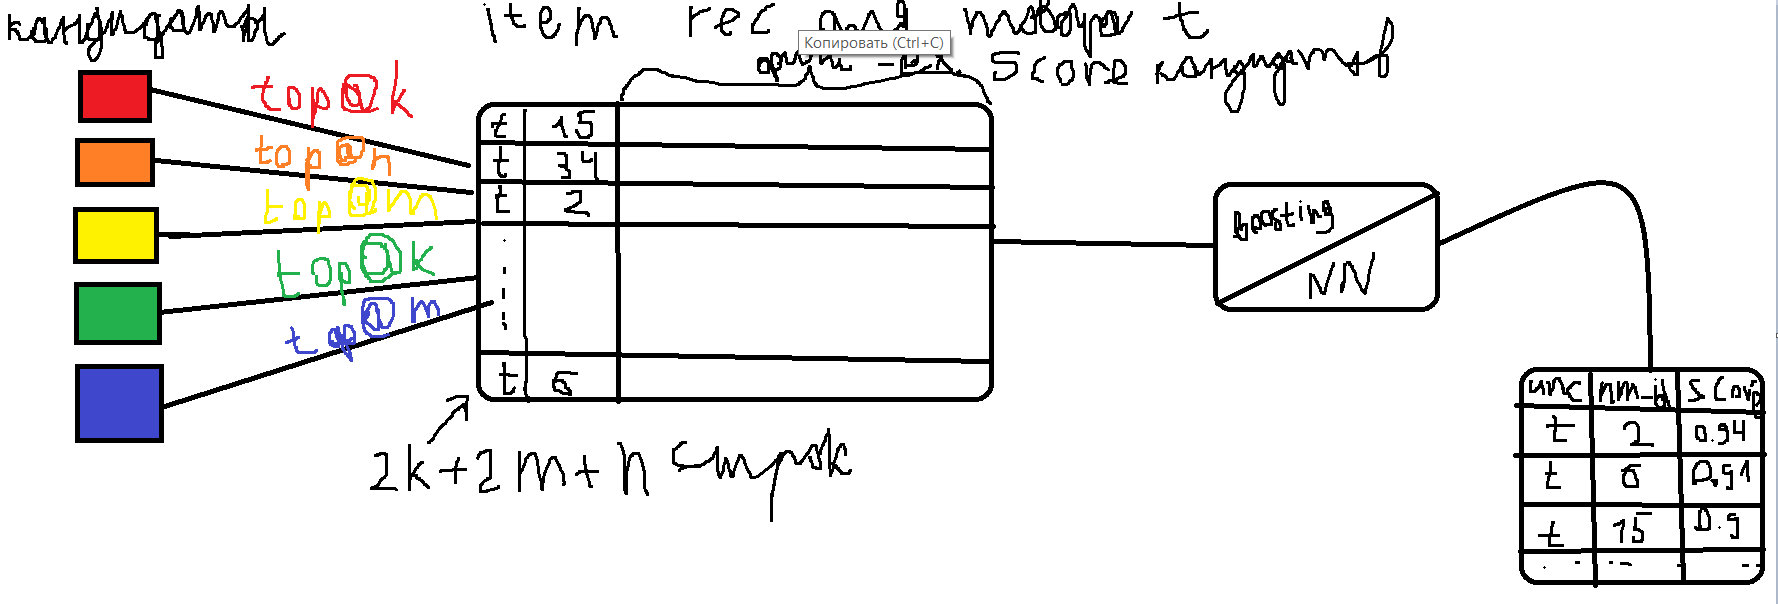

### Кандидаты

### Implicit Alternating Least Squares (Implicit ALS)

### Идея:

Метод неявных чередующихся наименьших квадратов - это вариант ALS, специально предназначенный для систем рекомендаций, где доступны только неявные данные обратной связи, такие как клики(в нашем случае). Метод решает проблемы, связанные с неявными данными обратной связи, где отсутствие явных рейтингов затрудняет определение предпочтений пользователей напрямую. Рассмотрим для сценария item2item (обучили ALS получили матрицу юзеров, матрицу итемов) - берем айтем, проводим оценку похожести со всеми остальными и выводим для каждого айтема наиболее похожие на него айтемы.

#### Плюсы:

- скорость работы (один раз факторизовали и дальше используем);
- выделяет группы пользователей и их интересы;
- способен учитывать неявный фидбек;
- для каждого айтема у нас разные рекомендации и нам не нужно для этого переобучать модель

#### Минусы:
- линейный метод;
- требует много памяти;
- не опирается на дополнительную информацию про пользователей и товары;
- при повторном нажатии на айтем будут те же рекомендации, т.е. у нас для каждого айтема фиксированная выдача рекомендаций;
- не учитывает временную составляющую и повторные взаимодействия.
- проблема холодного старта.

### SVD
### Идея:
SVD разлагает матрицу на три составные матрицы: U, Σ и $V^T$.
U: Представляет собой левые сингулярные векторы, которые описывают отношения между пользователями и латентными факторами.
Σ: Диагональная матрица, содержащая сингулярные значения, которые указывают на важность каждого латентного фактора.
$V^T$: Представляет собой правые сингулярные векторы, которые описывают связь между элементами и латентными факторами.

#### Плюсы:

- скорость работы (один раз факторизовали и дальше используем);
- выделяет группы пользователей и их интересы;

#### Минусы:
- необходимо полностью пересчитывать для актуализации данных;
- линейный метод;
- требует вычисления полного разложения матрицы user-item, что требует много памяти;
- не опирается на дополнительную информацию про пользователей и товары;
- сложно распараллелить;
- не учитывает хронологический порядок;
- проблема холодного старта.

### BPR
### Идея:
BPR — метод оптимизации, обучающий модель на парах взаимодействий: "кликнутый товар" и "не кликнутый". Модель учится ранжировать товары по вероятности клика.

#### Плюсы:
- Заточен под задачи ранжирования;
- Учитывает предпочтения пользователей.
#### Минусы:
- Требует генерации пар (позитивные и негативные примеры);
- Не использует дополнительные признаки без модификаций.
Применение:
Используем BPR для оптимизации ранжирования кандидатов, обучая модель на взаимодействиях. В качестве модели можно взять SVD.

### item2vec model
### Идея
Item2Vec представляет товары в виде векторов в многомерном пространстве так, что похожие товары имеют близкие векторы. Основан на принципах моделей для обработки текста (Word2Vec).

#### Плюсы:
- Быстрое построение рекомендаций после обучения.
- Захватывает скрытые зависимости между товарами.
- Захватывает локальный контекст.
- Простота реализации и интерпретации.

#### Минусы:
- Требуется большое количество данных для качественного обучения.
- Не учитывает контекст пользователя.
- Плохо работает для холодного старта (новые товары без взаимодействий).

### item-item KNN
### Идея
К оцененным пользователем товарам найдем наиболее похожие на них и порекомендуем. Похожесть между айтемами определяется, как
косинусная мера с поправкой на средний рейтинг
пользователей.

#### Плюсы:
- скорость работы;
- учитывает все товары в сессии.

#### Минусы:
- отдает предпочтение более популярным товарам, слабое покрытие;
- не учитывает сложные зависимости;
- проблема холодного старта для пользователей и товаров;
- для обновления необходимо пересчитывать матрицу похожести;
- не учитывает хронологический порядок;
- не опирается на дополнительную информацию про пользователей и товары.

### Graph-based Collaborative Filtering (Graph Neural Networks, GNNs)
### Идея:
Представляет пользователей и товары в виде графа, где ребра отражают взаимодействия(клики). Использует графовые нейронные сети для обучения эмбеддингов, которые учитывают как прямые, так и косвенные связи.
Например, даже если пользователь и товар напрямую не связаны, модель может учитывать промежуточные связи через других пользователей и товары.

#### Плюсы:
- Учет сложных связей между пользователями и товарами.
- Возможность использовать дополнительную информацию (атрибуты товаров, профили пользователей).

#### Минусы:
- Вычислительная сложность (особенно для больших графов).
- Зависимость от качества построения графа.
- Требуется большой объем данных для обучения.

### Content-based Filtering
### Идея:
Рекомендации основаны на схожести между характеристиками товаров (например, title, brandname, colornames, description(fasttext,word2vec), эмбеддинги изображений).

#### Плюсы:
- Простота реализации.
- Хорошо работает для новых пользователей или товаров (холодный старт).

#### Минусы:
- Не учитывает взаимодействия между пользователями и товарами.
- Требуется качественная разметка данных.

Заметка: можно дообучить на взаимодействиях используя метрик лернинг, например триплет лосс, где будет учитываться чтобы векторы похожих товаров  становился ближе, а векторы непохожих товаров дальше.

### Топ самых популярных
#### Идея

Выдаем рекомендации пользователям как топ популярных по какой-либо группе.

#### Плюсы:
- легко настраивать;
- скорость работы (можно посчитать в рамках временного периода и далее просто выдавать готовый ответ).
- для новых пользователей решит проблему холодного старта.

#### Минусы:
- отсутсвие персонализации;
- не рекомендует специфичные и редкие товары;
- не учитывает сложные зависимости и порядок;
- слабое покрытие;
- не опирается на дополнительную информацию про пользователей и товары;
- проблема холодного старта для товаров.

### Ранжирующая модель
Ранжирующая модель – это система, которая использует входные данные (признаки пользователей, товаров и их взаимодействий) для прогнозирования вероятности клика или другого целевого действия. Она строится поверх кандидатов, отобранных на первом этапе.

### CatBoost



#### Идея
CatBoost — это градиентный бустинг на деревьях решений, оптимизированный для работы с категориальными признаками. Он поддерживает задачи классификации, регрессии и ранжирования.

#### Плюсы:
- Работа с категориальными признаками: Автоматическая обработка категориальных данных без необходимости предварительного кодирования.
- Скорость: Быстрое обучение и предсказание.
- Устойчивость к переобучению: Использует Ordered Boosting для минимизации смещения.
- Интерпретируемость: Возможность анализа важности признаков.

#### Минусы:
- Плохая обработка мультимодальных данных: Например, изображений или сложных текстов.
- Ограниченная масштабируемость: Менее эффективен на огромных наборах данных по сравнению с глубокими моделями.

Применение:
CatBoost используется для ранжирования кандидатов, обучаясь на признаках товаров, скорах для товаров полученных от кандидатов и доп признаках, например colornames.
Для анкорного итема предлагает топ N товаров, выбранных из Кандидатов


### Нейронные сети, NMF(Neural Collaborative Filtering)
#### Идея:
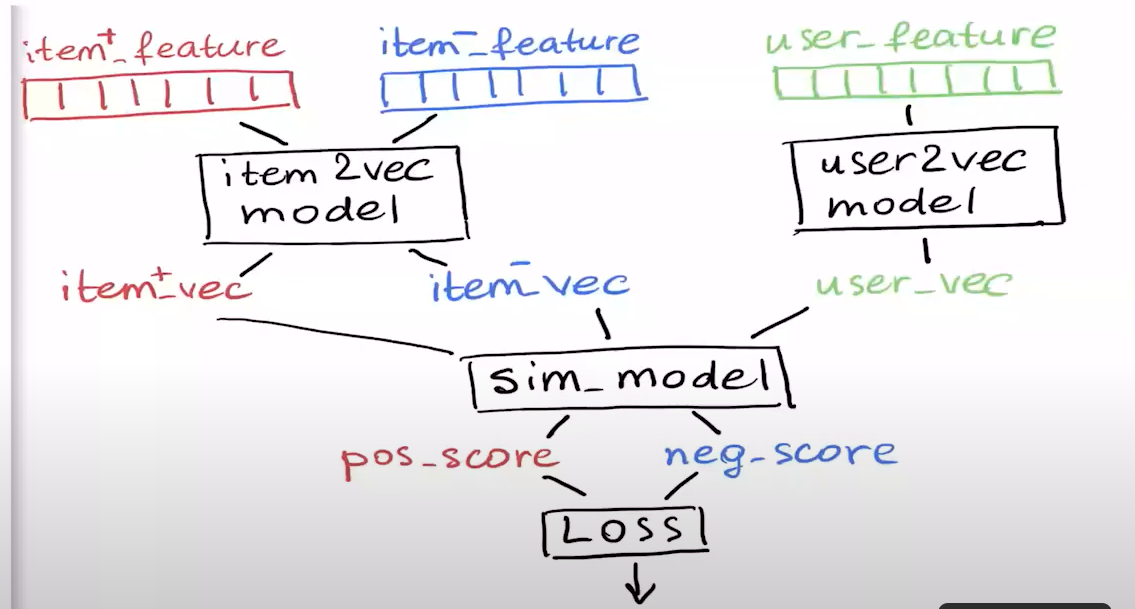![NMF](/content/sample_data/NMF.png)


#### Плюсы:
- Моделирование сложных зависимостей: Захватывает нелинейные и скрытые взаимодействия.
- Интеграция дополнительных данных: Поддержка мультимодальных данных (например, текстов, изображений).

#### Минусы:
- Длительное обучение: Требует большого объема данных и вычислительных ресурсов.
- Сложность настройки: Необходима тщательная работа с гиперпараметрами.
- Проблемы с интерпретируемостью: Сложно объяснить, почему модель выдала тот или иной результат.

Применение:
NCF используется для ранжирования кандидатов, обучаясь на взаимодействиях пользователей и товаров, а также их дополнительных признаках (например, текстовые и визуальные эмбеддинги).

## Персональные рекомендации


### Общая схема предоставления рекомендаций

Обучаем кандидатные модели и модель ранжирования, получаем кандидатов от кандидатных моделей, ранжируем, сохрняем где-то рекомендации, когда пользователю будут нужны рекомендации - читаем с файла и отправляем рекомендации.

Если нужно быстро обновить рекомендации - меняем доп фичи в ранжирующей модели и на старых кандидатах от кандидатных моделей делаем другие рекомендации. Далее переобучаем кандидатные модели на новых данных и опять делаем предсказание кандидатов, ранжируем их и получаем новые новые рекомендации.

### Кандидаты

### Implicit Alternating Least Squares (Implicit ALS)

### Идея:

Метод неявных чередующихся наименьших квадратов - это вариант ALS, специально предназначенный для систем рекомендаций, где доступны только неявные данные обратной связи, такие как клики(в нашем случае). Метод решает проблемы, связанные с неявными данными обратной связи, где отсутствие явных рейтингов затрудняет определение предпочтений пользователей напрямую. Рассмотрим относительно персональных рекомендаций.

#### Плюсы:

- скорость работы (один раз факторизовали и дальше используем);
- выделяет группы пользователей и их интересы;
- фиксирует как глобальные, так и локальные закономерности в данных;
- способен учитывать неявный фидбек;
- частично решает проблему холодного старта(относительно айтемов, так как выдача не зависит от конкретного айтема(НО ЕСЛИ У НАС по товару никто не нажимал он никогда не будет рекомендоваться)).

#### Минусы:
- линейный метод;
- вычислительно дорогой и требует много памяти;
- не опирается на дополнительную информацию про пользователей и товары;
- у каждого пользователя у нас фиксированная выдача рекомендаций, до момента ДООБУЧЕНИЯ als, То есть придется пересчитывать, сделав шаг als;
- не учитывает временную составляющую и повторные взаимодействия.

### Factorization Machines
#### Идея:
Факторизационные машины расширяют линейные модели, учитывая взаимодействия между признаками (пользователи, товары, их характеристики). Это достигается факторизацией низкого ранга, что позволяет работать с разреженными данными.

#### Плюсы:
- Эффективно работает с разреженными данными.
- Учитывает взаимодействия между признаками (например, пользователями и товарами).
- Легко интегрирует дополнительные данные (категории, бренды, текстовые эмбеддинги).

#### Минусы:
- Ограничение на парные взаимодействия.
- Требует настройки гиперпараметров.
- Менее гибкий, чем нейронные сети.
- долго учится

#### Применение:
Используем FM для предсказания кликов, обучаясь на взаимодействиях пользователей с товарами и их признаками (например, бренд, описание).
- Предсказание рейтинга. Ответ модели  a(x) можно интерпретировать, как вещественный рейтинг, и решать задачу регрессии.
- Бинарную классификацию рекомендовать/не рекомендовать. Тогда a(x) имеет смысл логита, и мы можем оптимизировать log loss или hinge loss.
- Ранжирование объектов. Тогда a(x) – это ранжирующая функция.


### user-item KNN
### Идея
Найдем наиболее "похожих" пользователей, которые оценили один и тот же товар. Похожесть между пользователя определяется, как
косинусная мера с поправкой на средний рейтинг
пользователей.

#### Плюсы:
- скорость работы;
- учитывает все товары в сессии.

#### Минусы:
- отдает предпочтение более популярным товарам, слабое покрытие;
- не учитывает сложные зависимости;
- проблема холодного старта для пользователей и товаров;
- для каждой сессии необходимо пересчитывать матрицу похожести;
- не учитывает хронологический порядок;
- не опирается на дополнительную информацию про пользователей и товары.

## Выбор подходящего решения

В рамках нашей задачи я считаю разумным отдать предпочтения методам способным учитывать неявный фидбек (тем более в нашем датасете на данный момент отсутствует явный фидбек) и модульной архитектуре с двухэтапной моделью, так как данный подход может быть расширяем и способен к работе с разными типами товаров, что в будущем даст преимущество над моделями, что используют только информацию о кликах.
И в двухэтапной модели также будем использовать нейронные сети и бустинги, так как у нас много интересных признаков итемов, которыми стоит воспользоваться.

Тем самым подходящее решение содержит в себе комбинацию кандидатов и выбора в качестве ранжирующей модели бустинга или нейронной сети для того, чтобы улучшить рекомендации с выявлением скрытых зависимостей в различных контентных фичах и колаборативных фичах.

